# Calculation-of-Vegetation-Cover-Index

Script in Python that analyzes satellite images to determine the proportion of vegetation surface cover (green area) versus hardscape. This is a usefull tool for eventually determining the ground cover (vegetation specifically) and its relationship with near surface temperature of neigbourhoods.

Usage licence details can be found here: https://github.com/Chuka-J-Uzo/Calculation-of-Vegetation-Cover-Index/blob/main/LICENSE

In [ ]:
import numpy as np
import cv2
import sklearn

Below is a sample satellite image of the area being analyzed. https://zoom.earth/#view=6.490923,3.355675,16z

My goal was to see how accurately my model could determine how much hardscape vs green cover my satellite image had. We picked an area in Surulere, Lagos, Nigeria to test.



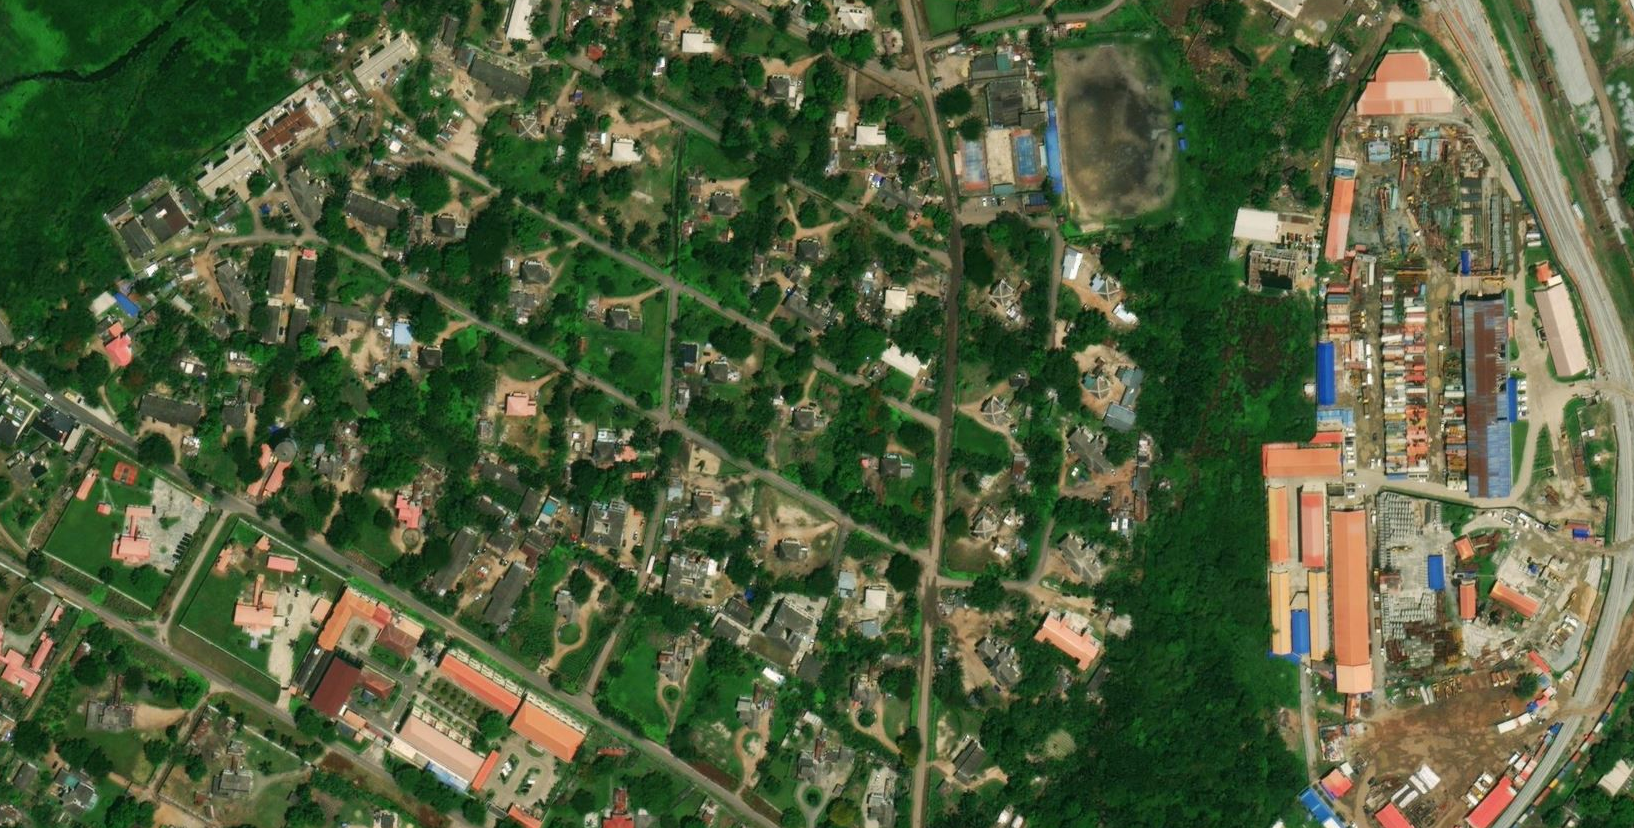

In [ ]:
# Load a satellite image
# image = cv2.imread("/content/drive/MyDrive/Python_projects and scripts/Satellite Surulere - without label - 2023-01-02 13-06-26.png")

image = cv2.imread("/content/drive/MyDrive/Python_projects/More Green - surulere 2023-01-02 13-31-54.png")





In [ ]:
# Preprocess each channel of the image to remove noise and improve the quality of the data
b, g, r = cv2.split(image)
b = cv2.fastNlMeansDenoising(b, None, 10, 7, 21)
b = cv2.equalizeHist(b)
g = cv2.fastNlMeansDenoising(g, None, 10, 7, 21)
g = cv2.equalizeHist(g)
r = cv2.fastNlMeansDenoising(r, None, 10, 7, 21)
r = cv2.equalizeHist(r)

# Merge the processed channels back into the original image
image = cv2.merge((b, g, r))



In [ ]:
# Segment the image into different regions using K-Means clustering
Z = image.reshape((-1, 3))
Z = np.float32(Z)

In [ ]:
# Define the number of clusters (i.e., segments) to use
k = 2

 In the script that I provided in the cell above, the number of clusters (i.e., segments) to use is defined as a variable called k. The value of k determines the number of segments or clusters that the K-Means algorithm will create when it segments the image.

 In this case, k is set to 2, which means that the K-Means algorithm will create two clusters or segments in the image. This is useful because we want to classify the segments as either green area or hardscape, and we only need two classes to do this.

 However, the value of k can be set to any integer greater than 1, depending on the complexity of the image and the number of classes you want to distinguish. For example, you could set k to 3 to create three clusters, or to 4 to create four clusters, and so on.

 The value of k can also be determined automatically using techniques such as the elbow method or the silhouette method. These methods can help you find the optimal value of k that best represents the structure of the data.




In [ ]:
# Run the K-Means algorithm
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret, label, center = cv2.kmeans(Z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)


In [ ]:
# Reshape the label array to the same size as the image
label = label.reshape(image.shape[0], image.shape[1])


In [ ]:
# Extract features from the segments to represent the characteristics of each class
features = []
for i in range(k):
    mask = (label == i)
    mask = mask.astype(np.uint8)
    segment = cv2.bitwise_and(image, image, mask=mask)
    mean = cv2.mean(segment, mask=mask)[:3]
    features.append(mean)

In [ ]:
# Convert the features list to a NumPy array
features = np.array(features)

In [ ]:
# Train a machine learning model to classify the segments as either green area or hardscape based on the extracted features
# For this example, we will use a simple linear classifier (i.e., a perceptron)
from sklearn.linear_model import Perceptron
classifier = sklearn.linear_model.Perceptron(max_iter=1000)
classifier.fit(features, [0, 1])

Perceptron()

I added the `import Perceptron` function because I got an AttributeError. The error `"AttributeError: module 'sklearn' has no attribute 'linear_model'"` usually occurs when you try to import a module or function from the sklearn library that does not exist or has been moved to a different location.

In this case, the `linear_model` module is not a part of the sklearn library. Instead, it is a submodule of the `sklearn.linear_model` module. To fix the error, you need to import the Perceptron class from the `sklearn.linear_model` module like shown in the cell above.

In [ ]:
# Test the model on a separate dataset to evaluate its performance
X_test = [[100, 100, 100], [200, 200, 200]]
y_test = [0, 1]
accuracy = classifier.score(X_test, y_test)

# Print the accuracy of the model
print("Accuracy:", accuracy)



'''This script uses the K-Means clustering algorithm to segment 
the satellite image into different regions or segments. 
It then extracts features from each segment, such as the mean color value, 
and uses a machine learning model (in this case, a perceptron) to classify 
the segments as either green area or hardscape. Finally, it calculates the 
proportion of green area versus hardscape in the image based on the predictions 
made by the model.'''


Accuracy: 0.5


'This script uses the K-Means clustering algorithm to segment \nthe satellite image into different regions or segments. \nIt then extracts features from each segment, such as the mean color value, \nand uses a machine learning model (in this case, a perceptron) to classify \nthe segments as either green area or hardscape. Finally, it calculates the \nproportion of green area versus hardscape in the image based on the predictions \nmade by the model.'

In [ ]:
# Use the trained model to classify the segments in the satellite image you want to analyze
predictions = classifier.predict(features)

# Calculate the proportion of green area versus hardscape in the image
green_area = predictions[predictions == 0].size / predictions.size
hardscape = predictions[predictions == 1].size / predictions.size

print("Green area:", green_area)
print("Hardscape:", hardscape)

Green area: 1.0
Hardscape: 0.0


In machine learning, the accuracy of a model is a measure of how well the model is able to predict the correct labels or outcomes for a given dataset. It is calculated as the ratio of the number of correct predictions made by the model to the total number of predictions.

*For example, if a model has an accuracy of 0.5 (or 50%), it means that the model is able to correctly predict the label for half of the samples in the dataset. This may indicate that the model is not very good at making predictions, or that the data is very difficult to classify.*

On the other hand, if a model has an accuracy of 0.9 (or 90%), it means that the model is able to correctly predict the label for almost all of the samples in the dataset. This may indicate that the model is very good at making predictions, or that the data is relatively easy to classify.

It's worth noting that the accuracy of a model can vary depending on the specific dataset and the complexity of the problem. A model that performs well on one dataset may not necessarily perform well on another dataset. Therefore, it's important to evaluate the performance of a model using a variety of metrics, such as precision, recall, and F1 score, in addition to accuracy.

# THE FLASK APPLICATION BELOW IS DEFECTIVE  (NEEDS REWORKING)

In [ ]:
#######  FLASK APPLICATION

from flask import Flask, render_template, request

app = Flask(__name__)

@app.route('/result', methods=["GET", "POST"])
def result():
    # If the request method is "POST", retrieve the values of the variables
    # green_area, hardscape, and accuracy from the request form
    if request.method == "POST":
        green_area = request.form['green_area']
        hardscape = request.form['hardscape']
        accuracy = request.form['accuracy']
        return render_template('results.html', green_area=green_area, hardscape=hardscape, accuracy=accuracy)

    # If the request method is "GET", return an empty form
    else:
        return render_template('results.html')

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


# HTML FILE TO DISPLAY CODE BELOW

In [ ]:
<html>

<head>
    <title>Result Page</title>
    <a href="http://localhost:5000/result">Result</a>
</head>

<body>
    

    <h1>Result</h1>
    <p>Green area: {{ green_area }}</p>
    <p>Hardscape: {{ hardscape }}</p>
    <p>Accuracy: {{ accuracy }}</p>
</body>

</html>